In [20]:
import pandas as pd
from datetime import datetime

from matplotlib import pyplot
from utils import utils as utils

<Axes: >

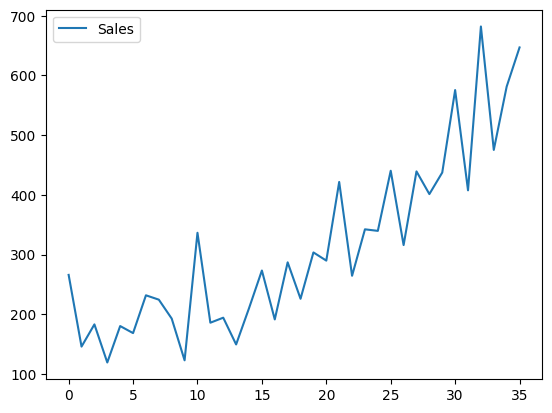

In [19]:
series = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv")

# print(series.head())
#Convert month to Year

series["Month"] = [datetime.strptime("200" + x, '%Y-%m').date()  for x in series.Month]
series.plot()

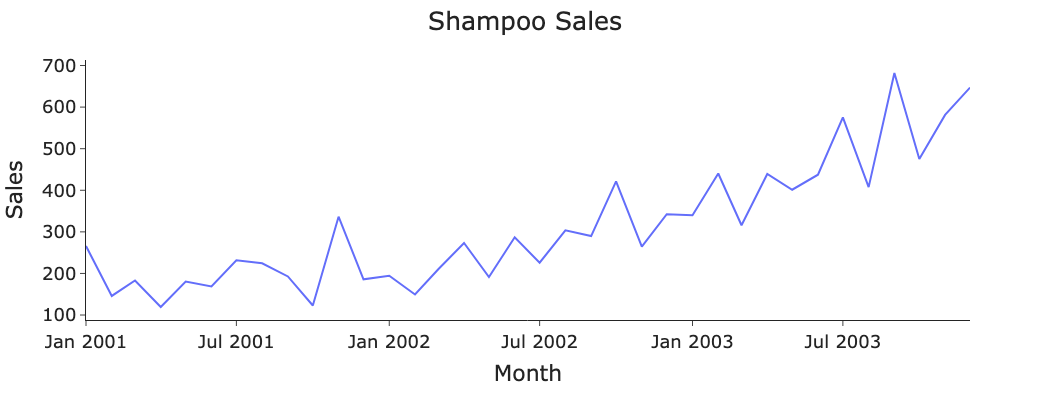

In [22]:
utils.plotting("Shampoo Sales", series, x="Month", y= "Sales", x_label="Month" , y_label="Sales")

Clearly the data is not stationary. 

ARIMA is generic

1. AR component => p
2. I : integrated => d ie order or degree of differencing needed to make it stationary
3. MA component =>(q)

e.g.

* AR(p) = ARIMA(p,0,0)
* MA(p) = ARIMA(0,0,q)

Assuming no differencing needed in the models, so putting I=0 above.


In [30]:
## Going back to above shampoo sales, seems single differencing might help

all_df = series.rename(columns={"Month":"month", "Sales":"sales"})
all_df.loc[:, "prev_sales"] = all_df.sales.shift(1)
all_df.loc[:, "diff_sales"] = all_df.loc[:, "sales"] - all_df.loc[:, "prev_sales"]
all_df.head()

,month,sales,prev_sales,diff_sales
0,2001-01-01,266.0,NaN,NaN
1,2001-02-01,145.9,266.0,-120.1
2,2001-03-01,183.1,145.9,37.2
3,2001-04-01,119.3,183.1,-63.8
4,2001-05-01,180.3,119.3,61.0


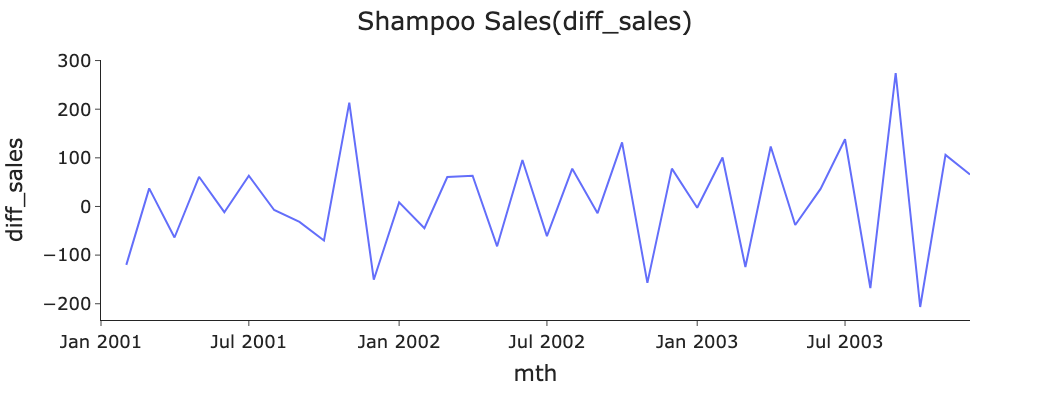

In [32]:
utils.plotting("Shampoo Sales(diff_sales)", all_df, x="month", y= "diff_sales", x_label="mth" , y_label="diff_sales")

In [37]:
all_df = all_df.dropna()

This series looks more stationary than undifferenced one!


#### autocorrelation plot

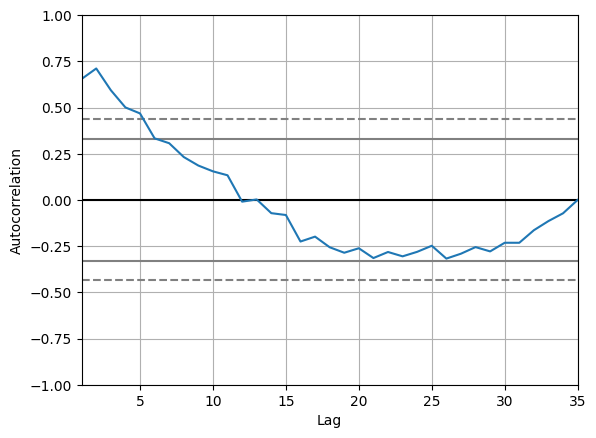

In [38]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(all_df.sales)
pyplot.show()

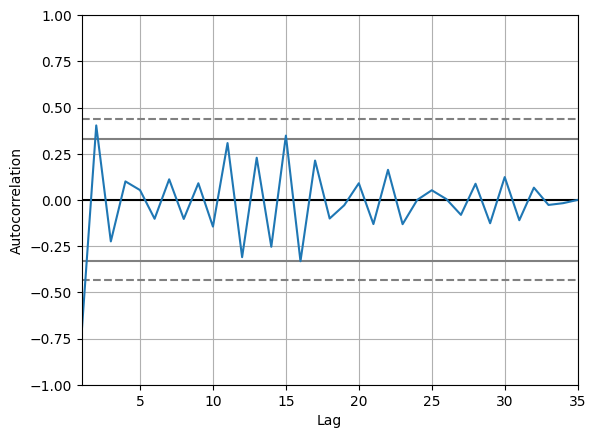

In [39]:
autocorrelation_plot(all_df.dropna().diff_sales)
pyplot.show()

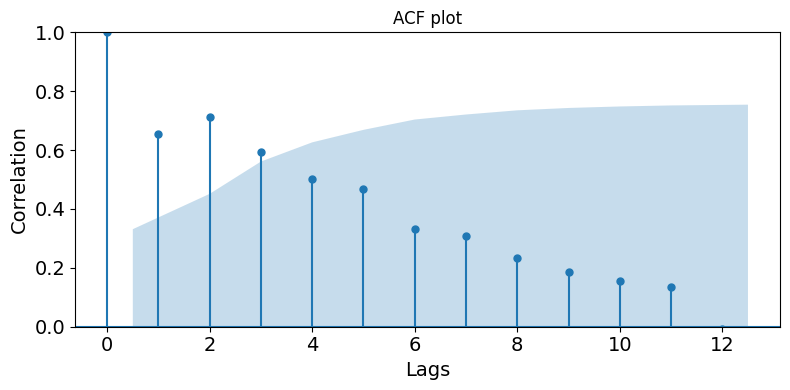

In [41]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(8,4))
plot_acf(all_df.sales, lags = 12)
plt.ylim(0,1)
plt.xlabel('Lags', fontsize = 14)
plt.ylabel('Correlation', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('ACF plot(Sales)')
plt.tight_layout()
plt.show()


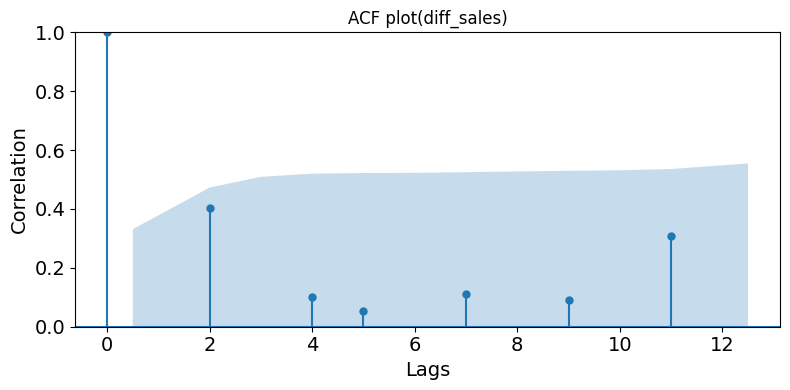

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(8,4))
plot_acf(all_df.diff_sales, lags = 12)
plt.ylim(0,1)
plt.xlabel('Lags', fontsize = 14)
plt.ylabel('Correlation', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('ACF plot(diff_sales)')
plt.tight_layout()
plt.show()
